# Using NLTK to compare pronoun and modal verb language use with Jane Austen's Persuasion and Melville's Moby Dick

In [1]:
import nltk
import re
% matplotlib inline

In [2]:
# Removing punctuation
punctuation = re.compile('\W|,')

In [3]:
# Stemming words
ss = nltk.SnowballStemmer('english')

In [4]:
# Modals
modals = ['can', 'could', 'may', 'might', 'must', 'will']

In [5]:
# Personal pronouns
pronouns = ['he', 'him', 'himself', 'she', 'her', 'herself']

### Frequency distribution for Jane Austen's novel Persuasion

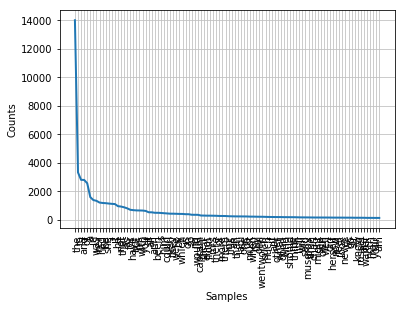

In [6]:
persuasion_text = nltk.corpus.gutenberg.words('austen-persuasion.txt')
persuasion_text = [' ' if punctuation.match(w) else w for w in persuasion_text]
persuasion_text = [ss.stem(w) for w in persuasion_text]
fdist_persuasion = nltk.FreqDist(w.lower() for w in persuasion_text)
fdist_persuasion.plot(100)

### Count of modal verbs in Persuasion

In [7]:
for m in modals:
    print(m + ':', fdist_persuasion[m], end=' ')

can: 107 could: 451 may: 87 might: 166 must: 228 will: 174 

### Count of personal pronouns in Persuasion

In [8]:
for p in pronouns:
    print(p + ':', fdist_persuasion[p], end=' ')

he: 961 him: 467 himself: 95 she: 1146 her: 1215 herself: 159 

### Frequency distribution for Melville's novel Moby Dick

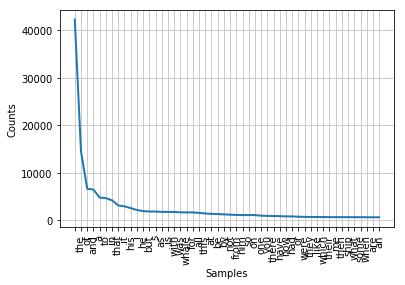

In [9]:
mobydick_text = nltk.corpus.gutenberg.words('melville-moby_dick.txt')
mobydick_text = [' ' if punctuation.match(x) else x for x in mobydick_text]
mobydick_text = [ss.stem(w) for w in mobydick_text]
fdist_mobydick = nltk.FreqDist(w.lower() for w in mobydick_text)
fdist_mobydick.plot(50)

### Count of modal verbs in Moby Dick

In [10]:
for m in modals:
    print(m + ':', fdist_mobydick[m], end=' ')

can: 236 could: 216 may: 240 might: 183 must: 283 will: 402 

### Count of personal pronouns in Moby Dick

In [11]:
for p in pronouns:
    print(p + ':', fdist_mobydick[p], end=' ')

he: 1896 him: 1067 himself: 205 she: 120 her: 332 herself: 7 

### Differences in usage of modals and personal pronouns

1. The counts for the modal verbs in both texts reveal more usage of the verbs which have uncertainty attached to them (ex 'could' in Emma and 'may' in Moby Dick).
2. The counts for the modal verbs in both texts reveal similar counts for stronger verbs (ex 'must' and 'will').
3. The personal pronouns in Emma tend to refer to the feminine gender much more than the masculine gender.
4. The personal pronouns in Moby Dick tend to refer to the masculine gender much more than the feminine gender.
5. Combining all these facts in a rough way might mean that the probability of the bigram ('she', 'could') appears more often in Emma and ('he', 'may') appears more often in Moby Dick.

6. The frequency distributions follow Zipf's law approximately

### Comparing texts using Conditional Frequency Distribution

In [12]:
persuasion = 'persuasion'
mobydick = 'mobydick'
texts = []
for w in persuasion_text:
    texts.append([persuasion, w])
for w in mobydick_text:
    texts.append([mobydick, w])
cfd = nltk.ConditionalFreqDist(texts)

In [13]:
cfd.tabulate(conditions=[persuasion, mobydick], samples=modals)

             can could   may might  must  will 
persuasion   107   451    87   166   228   174 
  mobydick   236   216   240   183   283   402 


In [14]:
cfd.tabulate(conditions=[persuasion, mobydick], samples=pronouns)

                he     him himself     she     her herself 
persuasion     961     467      95    1146    1215     159 
  mobydick    1896    1067     205     120     332       7 


### Comparing texts using Conditional Frequency Distribution
The conditional frequency distribution shows the same observations as individual counts.